# Installation of Packages

First install packages like numpy, scikit-learn, matplotlib

In [1]:
!pip install numpy scikit-learn matplotlib

## Importation of packages

We import the necessary packages

In [2]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Dataset

We load the necessary IRIS dataset. 

In [3]:
wine = datasets.load_wine()

## Description of the Dataset

### Input features

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Target feature

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Verify number of records

In [6]:
print(f"Number of Input Records: {len(wine.data)}")
print(f"Number of Target Records: {len(wine.target)}")

Number of Input Records: 178
Number of Target Records: 178


## Visulizing the dataset

In [7]:
x = wine.data
y = wine.target

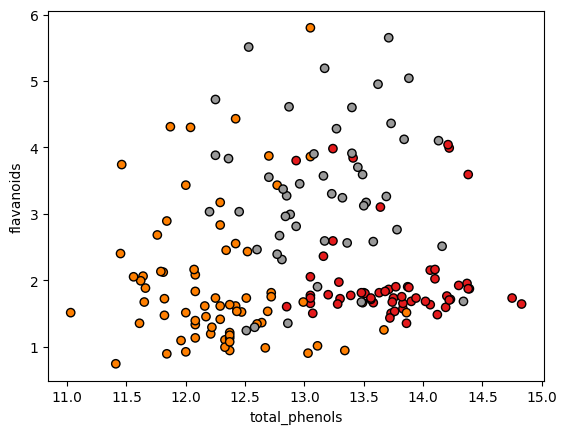

In [24]:
plot.scatter(x[:, 0], x[:, 1], c=y, cmap=plot.cm.Set1, edgecolor="k")
plot.xlabel(wine.feature_names[5])
plot.ylabel(wine.feature_names[6])
plot.show()

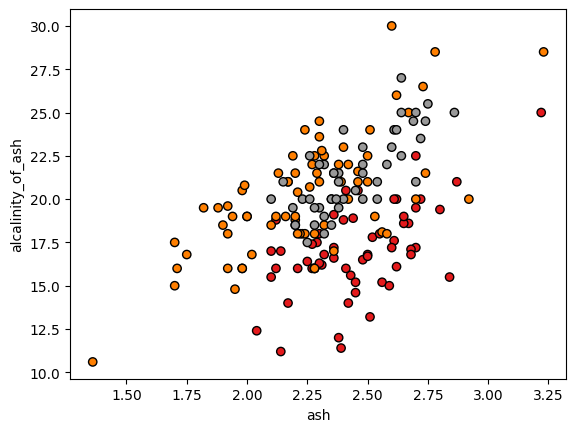

In [9]:
plot.scatter(x[:, 2], x[:, 3], c=y, cmap=plot.cm.Set1, edgecolor="k")
plot.xlabel(wine.feature_names[2])
plot.ylabel(wine.feature_names[3])
plot.show()

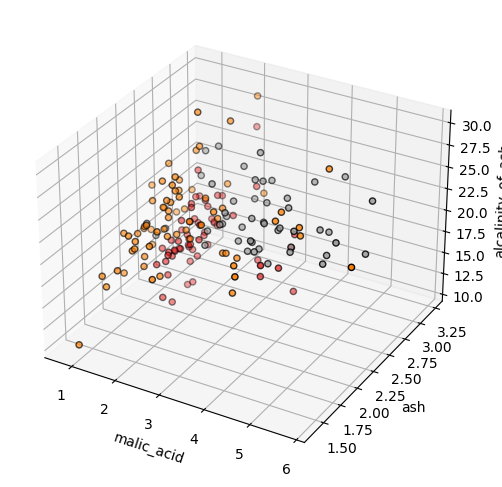

In [10]:
fig = plot.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.scatter(x[:, 1], x[:, 2], x[:, 3], c=y, cmap=plot.cm.Set1, edgecolor="k")
ax.set_xlabel(wine.feature_names[1])
ax.set_ylabel(wine.feature_names[2])
ax.set_zlabel(wine.feature_names[3])
plot.show()

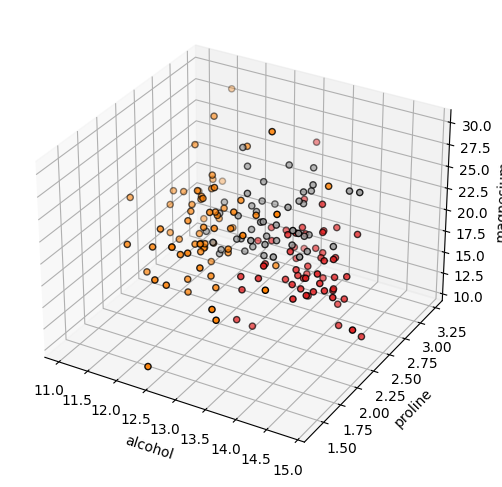

In [23]:
fig = plot.figure(figsize=(6, 6))
ax = fig.add_subplot(projection="3d")

ax.scatter(x[:, 0], x[:, 2], x[:, 3], c=y, cmap=plot.cm.Set1, edgecolor="k")
ax.set_xlabel(wine.feature_names[0])
ax.set_ylabel(wine.feature_names[12])
ax.set_zlabel(wine.feature_names[4])
plot.show()

## Training

In [12]:
x = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.7, random_state=12, stratify=y
)

In [13]:
print(f"Number of Training Records (input): {len(x_train)}")
print(f"Number of Training Records (target): {len(y_train)}")

print(f"Number of Test Records (input): {len(x_test)}")
print(f"Number of Test Records (input): {len(x_test)}")

Number of Training Records (input): 124
Number of Training Records (target): 124
Number of Test Records (input): 54
Number of Test Records (input): 54


## Standardization of features 

In [14]:
sc = StandardScaler()
sc.fit(x_train)
print(f"Mean: {sc.mean_} \nVariance={sc.var_}")

Mean: [1.30047581e+01 2.37379032e+00 2.35193548e+00 1.94088710e+01
 9.95161290e+01 2.29951613e+00 2.00870968e+00 3.52903226e-01
 1.58637097e+00 4.97782257e+00 9.67870968e-01 2.62653226e+00
 7.34419355e+02] 
Variance=[6.14365264e-01 1.36032838e+00 7.36639958e-02 1.13516149e+01
 2.25798127e+02 3.83523959e-01 9.57067690e-01 1.61738293e-02
 3.23856991e-01 5.47239437e+00 5.11881769e-02 4.75337168e-01
 8.90159532e+04]


In [15]:
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [16]:
classifier = MLPClassifier(max_iter=1000, random_state=12)

# training
classifier.fit(x_train_std, y_train)

MLPClassifier(max_iter=1000, random_state=12)

## Classification report

In [17]:
predicted_target = classifier.predict(x_test_std)

# classification report
print(metrics.classification_report(y_test, predicted_target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## Confusion matrix

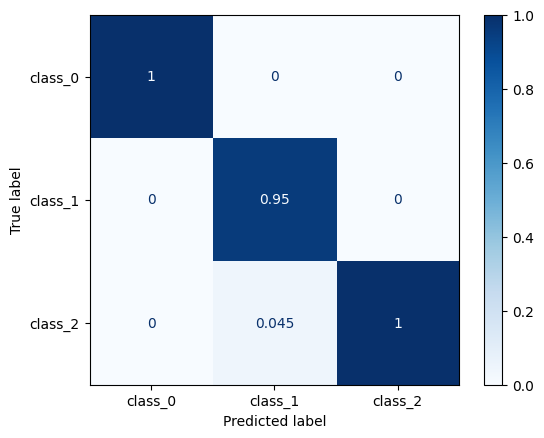

In [18]:
cm = confusion_matrix(y_test, predicted_target, normalize="pred")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plot.cm.Blues)

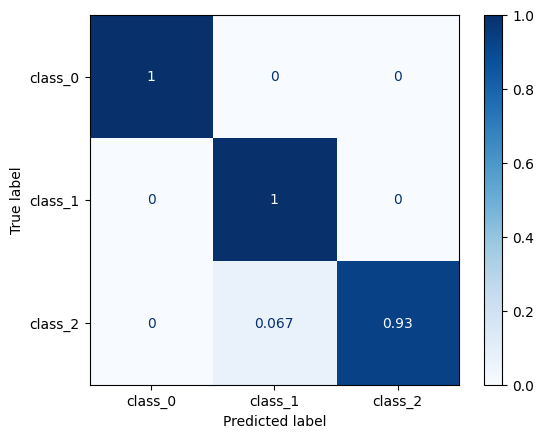

In [19]:
cm = confusion_matrix(y_test, predicted_target, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plot.cm.Blues)

## References

- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
- [3D scatterplot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
- [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Iris classification with sklearn perceptron](https://www.kaggle.com/code/choihanbin/iris-classification-with-sklearn-perceptron)
- [plot_confusion_matrix without estimator](https://stackoverflow.com/questions/60776749/plot-confusion-matrix-without-estimator)
- [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)